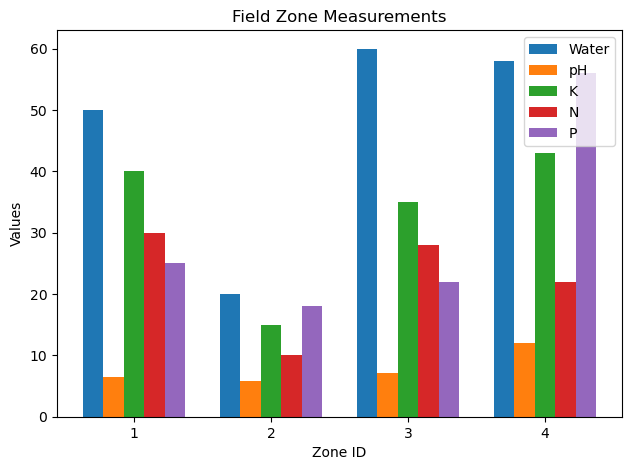

In [3]:
import tkinter as tk
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np

# Original classes
class FieldZone:
    def __init__(self, zone_id, water_level, ph_level, potassium, nitrogen, phosphorus):
        self.zone_id = zone_id
        self._water_level = water_level
        self._ph_level = ph_level
        self._potassium = potassium
        self._nitrogen = nitrogen
        self._phosphorus = phosphorus
        
    def get_water_level(self):
        return self._water_level

    def get_ph_level(self):
        return self._ph_level

    def get_potassium(self):
        return self._potassium

    def get_nitrogen(self):
        return self._nitrogen

    def get_phosphorus(self):
        return self._phosphorus

    def set_water_level(self, new_level):
        if 0 <= new_level <= 100: 
            self._water_level = new_level
            return True
        else:
            return False

    def set_ph_level(self, new_ph):
        if 0 <= new_ph <= 14:  
            self._ph_level = new_ph
            return True
        else:
            return False

    def set_potassium(self, new_potassium):
        if new_potassium >= 0:
            self._potassium = new_potassium
            return True
        else:
            return False

    def set_nitrogen(self, new_nitrogen):
        if new_nitrogen >= 0:
            self._nitrogen = new_nitrogen
            return True
        else:
            return False

    def set_phosphorus(self, new_phosphorus):
        if new_phosphorus >= 0:
            self._phosphorus = new_phosphorus
            return True
        else:
            return False

    def __str__(self):
        return f"Zone ID: {self.zone_id}, Water Level: {self.get_water_level()}, pH: {self.get_ph_level()}, K: {self.get_potassium()}, N: {self.get_nitrogen()}, P: {self.get_phosphorus()}"

class Node:
    def __init__(self, field_zone):
        self.field_zone = field_zone
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def __init__(self):
        self.root = None
    
    def insert(self, field_zone):
        self.root = self._insert(self.root, field_zone)
    
    def _insert(self, root, field_zone):  #O(log n)
        if not root:
            return Node(field_zone)
        
        if field_zone.zone_id < root.field_zone.zone_id:
            root.left = self._insert(root.left, field_zone)
        else:
            root.right = self._insert(root.right, field_zone)
        
        root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))
        return self._balance(root, field_zone.zone_id)
    
    def _balance(self, root, key):
        balance = self.get_balance(root)
        
        if balance > 1:
            if key < root.left.field_zone.zone_id:
                return self.right_rotate(root)
            else:
                root.left = self.left_rotate(root.left)
                return self.right_rotate(root)
        
        if balance < -1:
            if key > root.right.field_zone.zone_id:
                return self.left_rotate(root)
            else:
                root.right = self.right_rotate(root.right)
                return self.left_rotate(root)
        
        return root
    
    def left_rotate(self, z):
        y = z.right
        z.right = y.left
        y.left = z
        z.height = 1 + max(self.get_height(z.left), self.get_height(z.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))
        return y
    
    def right_rotate(self, z):
        y = z.left
        z.left = y.right
        y.right = z
        z.height = 1 + max(self.get_height(z.left), self.get_height(z.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))
        return y
    
    def get_height(self, root):
        return root.height if root else 0
    
    def get_balance(self, root):
        return self.get_height(root.left) - self.get_height(root.right) if root else 0
    
    def delete(self, zone_id):
        self.root = self._delete(self.root, zone_id)
    
    def _delete(self, root, zone_id):  #O(log n)
        if not root:
            return root
        
        if zone_id < root.field_zone.zone_id:
            root.left = self._delete(root.left, zone_id)
        elif zone_id > root.field_zone.zone_id:
            root.right = self._delete(root.right, zone_id)
        else:
            if not root.left:
                return root.right
            elif not root.right:
                return root.left
            
            temp = self._get_min(root.right)
            root.field_zone = temp.field_zone
            root.right = self._delete(root.right, temp.field_zone.zone_id)
        
        root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))
        return self._balance(root, zone_id)
    
    def _get_min(self, root):
        while root.left:
            root = root.left
        return root

class LinkedListNode:
    def __init__(self, field_zone):
        self.field_zone = field_zone
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None
    
    def insert(self, field_zone):   #O(n)
        new_node = LinkedListNode(field_zone)
        if not self.head:
            self.head = new_node
        else:
            temp = self.head
            while temp.next:
                temp = temp.next
            temp.next = new_node

    def delete(self, zone_id):    #O(n)
        temp = self.head
        prev = None
    
        if temp and temp.field_zone.zone_id == zone_id:
            self.head = temp.next  
            return 
    
        while temp and temp.field_zone.zone_id != zone_id:
            prev = temp
            temp = temp.next
    
        if not temp:
            return
    
        prev.next = temp.next

    def display(self):
        result = []
        temp = self.head
        while temp:
            result.append(temp.field_zone)
            temp = temp.next
        return result

class FieldZoneManager:
    def __init__(self):
        self.zones = {}
        self.avl_tree = AVLTree()
        self.linked_list = LinkedList()
    
    def add_zone(self, zone_id, water_level, ph_level, potassium, nitrogen, phosphorus):  #O(n)
        # Convert inputs to appropriate types
        try:
            zone_id = int(zone_id)
            water_level = float(water_level)
            ph_level = float(ph_level)
            potassium = float(potassium)
            nitrogen = float(nitrogen)
            phosphorus = float(phosphorus)
        except ValueError:
            return False, "All values must be numeric"
        
        # Check if zone ID already exists
        if zone_id in self.zones:
            return False, f"Zone ID {zone_id} already exists"
        
        # Validate ranges
        if not (0 <= water_level <= 100):
            return False, "Water level must be between 0 and 100"
        if not (0 <= ph_level <= 14):
            return False, "pH level must be between 0 and 14"
        if potassium < 0 or nitrogen < 0 or phosphorus < 0:
            return False, "Nutrient values must be non-negative"
        
        field_zone = FieldZone(zone_id, water_level, ph_level, potassium, nitrogen, phosphorus)
        
        self.zones[zone_id] = field_zone
        self.avl_tree.insert(field_zone)
        self.linked_list.insert(field_zone)
        return True, f"Zone {zone_id} added successfully"
    
    def delete_zone(self, zone_id):    #O(n)
        try:
            zone_id = int(zone_id)
        except ValueError:
            return False, "Zone ID must be numeric"
            
        if zone_id in self.zones:
            del self.zones[zone_id]
            self.avl_tree.delete(zone_id)
            self.linked_list.delete(zone_id)
            return True, f"Zone {zone_id} deleted successfully"
        else:
            return False, f"Zone {zone_id} not found"
    
    def get_all_zones(self):    #O(n)
        return list(self.zones.values())
    
    def get_zone(self, zone_id):
        return self.zones.get(int(zone_id))
    
    def update_zone(self, zone_id, water_level=None, ph_level=None, potassium=None, nitrogen=None, phosphorus=None):   #O(n)
        try:
            zone_id = int(zone_id)
        except ValueError:
            return False, "Zone ID must be numeric"
            
        if zone_id not in self.zones:
            return False, f"Zone {zone_id} not found"
            
        zone = self.zones[zone_id]
        updated = False
        message = f"Updated Zone {zone_id}:"
        
        if water_level is not None:
            try:
                water_level = float(water_level)
                if zone.set_water_level(water_level):
                    updated = True
                    message += " water level,"
                else:
                    return False, "Water level must be between 0 and 100"
            except ValueError:
                return False, "Water level must be numeric"
                
        if ph_level is not None:
            try:
                ph_level = float(ph_level)
                if zone.set_ph_level(ph_level):
                    updated = True
                    message += " pH level,"
                else:
                    return False, "pH level must be between 0 and 14"
            except ValueError:
                return False, "pH level must be numeric"
                
        if potassium is not None:
            try:
                potassium = float(potassium)
                if zone.set_potassium(potassium):
                    updated = True
                    message += " potassium,"
                else:
                    return False, "Potassium must be non-negative"
            except ValueError:
                return False, "Potassium must be numeric"
                
        if nitrogen is not None:
            try:
                nitrogen = float(nitrogen)
                if zone.set_nitrogen(nitrogen):
                    updated = True
                    message += " nitrogen,"
                else:
                    return False, "Nitrogen must be non-negative"
            except ValueError:
                return False, "Nitrogen must be numeric"
                
        if phosphorus is not None:
            try:
                phosphorus = float(phosphorus)
                if zone.set_phosphorus(phosphorus):
                    updated = True
                    message += " phosphorus,"
                else:
                    return False, "Phosphorus must be non-negative"
            except ValueError:
                return False, "Phosphorus must be numeric"
        
        if updated:
            message = message[:-1]
            return True, message
        else:
            return False, "No updates provided"
    
    def check_low_levels(self, water_threshold=30, ph_min=6, ph_max=7.5, nutrient_threshold=20):  #O(n)
        low_zones = [
            zone for zone in self.zones.values()
            if (zone.get_water_level() < water_threshold or
                zone.get_ph_level() < ph_min or
                zone.get_ph_level() > ph_max or
                zone.get_potassium() < nutrient_threshold or
                zone.get_nitrogen() < nutrient_threshold or
                zone.get_phosphorus() < nutrient_threshold)
        ]
        return low_zones


# GUI Application
class FieldZoneApp(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Field Zone Management System")
        self.geometry("1200x700")
        self.manager = FieldZoneManager()
        
        # Load sample data
        sample_data = [
            (1, 50, 6.5, 40, 30, 25),
            (2, 20, 5.8, 15, 10, 18),
            (3, 60, 7.2, 35, 28, 22)
        ]
        for d in sample_data:
            self.manager.add_zone(*d)
        
        self.setup_ui()
        self.update_zone_list()
        self.update_alerts()
        
    def setup_ui(self):
        # Main frame layout
        self.main_frame = ttk.Frame(self)
        self.main_frame.pack(fill=tk.BOTH, expand=True, padx=10, pady=10)
        
        # Left panel for zone list and actions
        self.left_panel = ttk.Frame(self.main_frame)
        self.left_panel.pack(side=tk.LEFT, fill=tk.BOTH, expand=True, padx=5, pady=5)
        
        # Right panel for visualization
        self.right_panel = ttk.Frame(self.main_frame)
        self.right_panel.pack(side=tk.RIGHT, fill=tk.BOTH, expand=True, padx=5, pady=5)
        
        # Setup each component
        self.setup_zone_list()
        self.setup_action_buttons()
        self.setup_zone_form()
        self.setup_visualization()
        self.setup_alerts()
        
    def setup_zone_list(self):
        list_frame = ttk.LabelFrame(self.left_panel, text="Field Zones")
        list_frame.pack(fill=tk.BOTH, expand=True, padx=5, pady=5)
        
        # Create treeview for zone list
        columns = ("ID", "Water", "pH", "K", "N", "P")
        self.zone_tree = ttk.Treeview(list_frame, columns=columns, show="headings")
        
        # Set column headings
        for col in columns:
            self.zone_tree.heading(col, text=col)
            self.zone_tree.column(col, width=50)
        
        # Add scrollbar
        scrollbar = ttk.Scrollbar(list_frame, orient=tk.VERTICAL, command=self.zone_tree.yview)
        self.zone_tree.configure(yscroll=scrollbar.set)
        
        # Pack components
        self.zone_tree.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
        scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        
        # Bind selection event
        self.zone_tree.bind("<<TreeviewSelect>>", self.on_zone_select)
        
    def setup_action_buttons(self):
        button_frame = ttk.Frame(self.left_panel)
        button_frame.pack(fill=tk.X, pady=5)
        
        ttk.Button(button_frame, text="Add Zone", command=self.clear_form).pack(side=tk.LEFT, padx=5)
        ttk.Button(button_frame, text="Update Selected", command=self.update_selected).pack(side=tk.LEFT, padx=5)
        ttk.Button(button_frame, text="Delete Selected", command=self.delete_selected).pack(side=tk.LEFT, padx=5)
       
    def setup_zone_form(self):
        form_frame = ttk.LabelFrame(self.left_panel, text="Zone Details")
        form_frame.pack(fill=tk.BOTH, pady=5)
        
        # Create form fields
        fields = [
            ("Zone ID:", "zone_id"),
            ("Water Level:", "water_level"),
            ("pH Level:", "ph_level"),
            ("Potassium (K):", "potassium"),
            ("Nitrogen (N):", "nitrogen"),
            ("Phosphorus (P):", "phosphorus")
        ]
        
        self.form_vars = {}
        row = 0
        
        for label_text, field_name in fields:
            ttk.Label(form_frame, text=label_text).grid(row=row, column=0, sticky=tk.W, padx=5, pady=2)
            var = tk.StringVar()
            entry = ttk.Entry(form_frame, textvariable=var)
            entry.grid(row=row, column=1, sticky=tk.W+tk.E, padx=5, pady=2)
            self.form_vars[field_name] = var
            row += 1
        
        # Submit button
        ttk.Button(form_frame, text="Save Zone", command=self.save_zone).grid(row=row, column=0, columnspan=2, pady=5)
        
    def setup_visualization(self):
        viz_frame = ttk.LabelFrame(self.right_panel, text="Zone Visualization")
        viz_frame.pack(fill=tk.BOTH, expand=True, padx=5, pady=5)
        
        # Create figure for matplotlib
        self.fig, self.ax = plt.subplots(figsize=(6, 4))
        self.canvas = FigureCanvasTkAgg(self.fig, master=viz_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
    def setup_alerts(self):
        alert_frame = ttk.LabelFrame(self.right_panel, text="Low Level Alerts")
        alert_frame.pack(fill=tk.BOTH, pady=5)
        
        # Create text widget for alerts
        self.alert_text = tk.Text(alert_frame, height=6, wrap=tk.WORD)
        self.alert_text.pack(fill=tk.BOTH, expand=True, padx=5, pady=5)
        self.alert_text.config(state=tk.DISABLED)
        
    def update_zone_list(self):
        # Clear existing items
        for item in self.zone_tree.get_children():
            self.zone_tree.delete(item)
        
        # Add zones from manager
        for zone in self.manager.get_all_zones():
            values = (
                zone.zone_id,
                zone.get_water_level(),
                zone.get_ph_level(),
                zone.get_potassium(),
                zone.get_nitrogen(),
                zone.get_phosphorus()
            )
            self.zone_tree.insert("", tk.END, values=values)
        
        # Update visualization
        self.update_visualization()
        
    def update_visualization(self):
        zones = self.manager.get_all_zones()
        if not zones:
            return
            
        # Clear previous plot
        self.ax.clear()
        
        # Extract data
        zone_ids = [zone.zone_id for zone in zones]
        water_levels = [zone.get_water_level() for zone in zones]
        ph_levels = [zone.get_ph_level() for zone in zones]
        potassium = [zone.get_potassium() for zone in zones]
        nitrogen = [zone.get_nitrogen() for zone in zones]
        phosphorus = [zone.get_phosphorus() for zone in zones]
        
        # Set width of bars
        barWidth = 0.15
        
        # Set position of bars on X axis
        r1 = np.arange(len(zone_ids))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]
        r4 = [x + barWidth for x in r3]
        r5 = [x + barWidth for x in r4]
        
        # Create bars
        self.ax.bar(r1, water_levels, width=barWidth, label='Water')
        self.ax.bar(r2, ph_levels, width=barWidth, label='pH')
        self.ax.bar(r3, potassium, width=barWidth, label='K')
        self.ax.bar(r4, nitrogen, width=barWidth, label='N')
        self.ax.bar(r5, phosphorus, width=barWidth, label='P')
        
        # Add labels and legend
        self.ax.set_xlabel('Zone ID')
        self.ax.set_ylabel('Values')
        self.ax.set_title('Field Zone Measurements')
        self.ax.set_xticks([r + barWidth*2 for r in range(len(zone_ids))])
        self.ax.set_xticklabels(zone_ids)
        self.ax.legend()
        
        # Redraw
        self.canvas.draw()
        
    def update_alerts(self):
        alerts = self.manager.check_low_levels()
        
        # Enable text widget for editing
        self.alert_text.config(state=tk.NORMAL)
        
        # Clear existing text
        self.alert_text.delete(1.0, tk.END)
        
        if alerts:
            for zone in alerts:
                issues = []
                if zone.get_water_level() < 30:
                    issues.append(f"low water ({zone.get_water_level()})")
                if zone.get_ph_level() < 6 or zone.get_ph_level() > 7.5:
                    issues.append(f"pH issue ({zone.get_ph_level()})")
                if zone.get_potassium() < 20:
                    issues.append(f"low K ({zone.get_potassium()})")
                if zone.get_nitrogen() < 20:
                    issues.append(f"low N ({zone.get_nitrogen()})")
                if zone.get_phosphorus() < 20:
                    issues.append(f"low P ({zone.get_phosphorus()})")
                
                alert_text = f"Zone {zone.zone_id}: {', '.join(issues)}\n"
                self.alert_text.insert(tk.END, alert_text)
        else:
            self.alert_text.insert(tk.END, "No alerts - all zones within acceptable parameters.")
        
        # Disable editing
        self.alert_text.config(state=tk.DISABLED)
        
    def on_zone_select(self, event):
        selected_item = self.zone_tree.selection()
        if not selected_item:
            return
            
        # Get zone ID from selection
        zone_id = self.zone_tree.item(selected_item[0], "values")[0]
        zone = self.manager.get_zone(zone_id)
        
        if zone:
            # Populate form fields
            self.form_vars["zone_id"].set(zone.zone_id)
            self.form_vars["water_level"].set(zone.get_water_level())
            self.form_vars["ph_level"].set(zone.get_ph_level())
            self.form_vars["potassium"].set(zone.get_potassium())
            self.form_vars["nitrogen"].set(zone.get_nitrogen())
            self.form_vars["phosphorus"].set(zone.get_phosphorus())
    
    def clear_form(self):
        # Clear all form fields
        for var in self.form_vars.values():
            var.set("")
    
    def save_zone(self):
        # Get values from form
        try:
            zone_id = self.form_vars["zone_id"].get()
            water_level = self.form_vars["water_level"].get()
            ph_level = self.form_vars["ph_level"].get()
            potassium = self.form_vars["potassium"].get()
            nitrogen = self.form_vars["nitrogen"].get()
            phosphorus = self.form_vars["phosphorus"].get()
            
            # Check if zone exists
            existing_zone = self.manager.get_zone(zone_id) if zone_id else None
            
            if existing_zone:
                # Update existing zone
                success, message = self.manager.update_zone(
                    zone_id, water_level, ph_level, potassium, nitrogen, phosphorus
                )
            else:
                # Add new zone
                success, message = self.manager.add_zone(
                    zone_id, water_level, ph_level, potassium, nitrogen, phosphorus
                )
                
            if success:
                messagebox.showinfo("Success", message)
                self.update_zone_list()
                self.update_alerts()
                self.clear_form()
            else:
                messagebox.showerror("Error", message)
                
        except Exception as e:
            messagebox.showerror("Error", str(e))
    
    def update_selected(self):
        selected_item = self.zone_tree.selection()
        if not selected_item:
            messagebox.showwarning("Warning", "Please select a zone to update.")
            return
            
        self.save_zone()
    
    def delete_selected(self):
        selected_item = self.zone_tree.selection()
        if not selected_item:
            messagebox.showwarning("Warning", "Please select a zone to delete.")
            return
            
        # Get zone ID from selection
        zone_id = self.zone_tree.item(selected_item[0], "values")[0]
        
        # Confirm deletion
        if messagebox.askyesno("Confirm Delete", f"Are you sure you want to delete Zone {zone_id}?"):
            success, message = self.manager.delete_zone(zone_id)
            
            if success:
                messagebox.showinfo("Success", message)
                self.update_zone_list()
                self.update_alerts()
                self.clear_form()
            else:
                messagebox.showerror("Error", message)
    
# Run the application
if __name__ == "__main__":
    app = FieldZoneApp()
    app.mainloop()